# 11. OLS with SGD by ScikitLearn
# DATA SET PREPROCESSING

## 0 . Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import math

## 1. Regression Data Sets

### a ) Generate $D_1$

#### a i) Initialize Matrix X

First, we will generate a $100x1$ matrix which is normally distributed.

In [2]:
#creating the normally distributed data set 
mu =1
sigma = 0.05
random.seed(3116)
X = (np.random.normal(mu, sigma, 100)).reshape((100,1))

#checking the shape
print(X.shape)

(100, 1)


#### a ii)  Generate Matrix Y

Nowm we will generate target y which is $100x1$ matrix and satisfies

$ \begin{equation}
y = 1.3 x^2 + 4,8x + 8 +\psi
\end{equation}$

For this reason first we have to generate $\psi$.

##### Generating $\psi$

In [3]:
random.seed(3116)
psi = np.random.rand(100,1)

##### Generating Y

In [4]:
one_vector = np.ones((100,1)) 

In [5]:
Y= 1.3 * (X**2) + 4.8 * X + 8 * one_vector + psi

In [6]:
Y.shape

(100, 1)

### b) $D_2$ Dataset

In [7]:
wine_quality = pd.read_csv('winequality-red.csv', sep=';')

In [8]:
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# EXERCISE 1
# GLM WITH SCIKIT LEARN

##  0. IMPORTING THE LIBRARIES

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

## 1. TRAIN AND TEST SETS

### 1.1 Train and Test Sets: $D_1$ 

In [10]:
#adding a one vector for bias
x =np.hstack((X,one_vector))

#creating train set
d_one_train_x = x[:80]
d_one_train_y =Y[:80]

#creating test set
d_one_test_x = x[80:100]
d_one_test_y =Y[80:100]


### 1.2 Train and Test Sets: $D_2$

In [11]:
ratio =math.floor(int(wine_quality.shape[0])*0.8)

In [12]:
d_two_train = wine_quality.iloc[:ratio,:]
d_two_test= wine_quality.iloc[ratio:,:]

In [13]:
d_two_train_x = np.array(d_two_train.iloc[:,:11])
d_two_train_y = np.ravel(np.array(d_two_train.iloc[:,11:12]))

d_two_test_x = np.array(d_two_test.iloc[:,:11])
d_two_test_y =np.array( d_two_test.iloc[:,11:])


#  MODEL 1: ORDINARY LEAST SQUARES

## 1. OLS: Hyperparameter Tuning Manually

### OLS: Hyperparameter  1 : learning rate =0.000001, number of iteration=50

In [14]:
#learning rate=0.000001 number of iteration =50
reg_one = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=50,learning_rate='constant',eta0=0.000001)
reg_one.fit(d_two_train_x,d_two_train_y)


#predicted y values
predicted_wine_quality = reg_one.predict(d_two_test_x)


#mse error
rmse_wine =mean_squared_error(d_two_test_y,predicted_wine_quality,squared=False)



C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [15]:
#rmse
print('RMSE for Wine Quality Data Set:\n',rmse_wine)

RMSE for Wine Quality Data Set:
 0.7568611137174875


In [16]:
rmse_one_train =[]
rmse_one_test=[]
for i in range(0,50):
    reg_one = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=i+1,learning_rate='constant',eta0=0.000001)
    reg_one.fit(d_two_train_x,d_two_train_y)
    predicted_wine_quality_test = reg_one.predict(d_two_test_x)
    predicted_wine_quality_train = reg_one.predict(d_two_train_x)
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_one_train.append(rmse_wine_train)
    rmse_one_test.append(rmse_wine_test)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

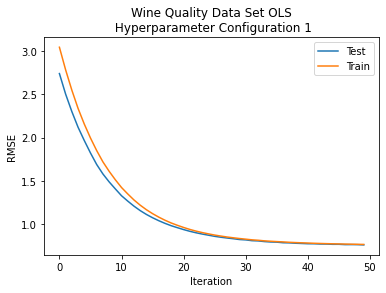

In [17]:
plt.title('Wine Quality Data Set OLS\n Hyperparameter Configuration 1')
plt.plot(rmse_one_test, label='Test')
plt.plot(rmse_one_train, label = 'Train')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

 ### OLS: Hyperparameter 2 : learning rate =0.000009, number of iteration=50

In [18]:
#learning rate=0.000009, number of iteration=1000
reg_two = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=50,learning_rate='constant',eta0=0.000009)
reg_two.fit(d_two_train_x,d_two_train_y)


#predicted y values
predicted_wine_quality_two = reg_two.predict(d_two_test_x)


#mse error
rmse_wine_two =mean_squared_error(d_two_test_y,predicted_wine_quality_two,squared=False)

#rmse
print('RMSE for Wine Quality Data Set:\n',rmse_wine_two )


RMSE for Wine Quality Data Set:
 0.7175958831116794


In [19]:
rmse_two_train =[]
rmse_two_test=[]
for i in range(0,50):
    reg_two = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=i+1,learning_rate='constant',eta0=0.000009)
    reg_two.fit(d_two_train_x,d_two_train_y)
    predicted_wine_quality_test = reg_two.predict(d_two_test_x)
    predicted_wine_quality_train = reg_two.predict(d_two_train_x)
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_two_train.append(rmse_wine_train)
    rmse_two_test.append(rmse_wine_test)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

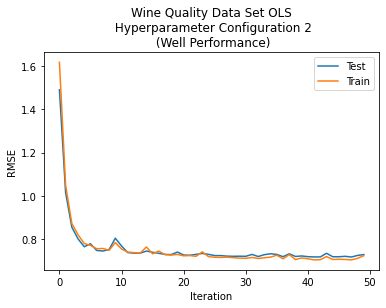

In [20]:
plt.title('Wine Quality Data Set OLS\n Hyperparameter Configuration 2\n (Well Performance)')
plt.plot(rmse_two_test ,label='Test')
plt.plot(rmse_two_train,label='Train')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

###  OLS: Hyperparameter 3 : learning rate =0.009, number of iteration=1000

In [21]:
#learning rate=0.01
reg_two = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=1000,learning_rate='constant',eta0=0.09)
reg_two.fit(d_two_train_x,d_two_train_y)


#predicted y values
predicted_wine_quality_two = reg_two.predict(d_two_test_x)


#mse error
rmse_wine_three =mean_squared_error(d_two_test_y,predicted_wine_quality_two,squared=False)

#rmse
print('RMSE for Wine Quality Data Set:\n',rmse_wine_three)



RMSE for Wine Quality Data Set:
 207933002425470.4


In [22]:
rmse_three_train =[]
rmse_three_test=[]
for i in range(0,1000):
    reg_three = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=i+1,learning_rate='constant',eta0=0.09)
    reg_three.fit(d_two_train_x,d_two_train_y)
    predicted_wine_quality_test = reg_three.predict(d_two_test_x)
    predicted_wine_quality_train = reg_three.predict(d_two_train_x)
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_three_train.append(rmse_wine_train)
    rmse_three_test.append(rmse_wine_test)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

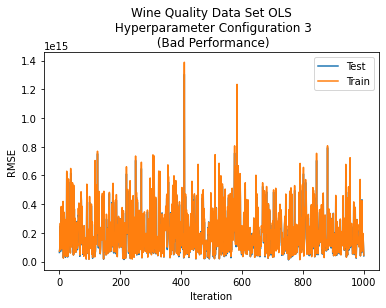

In [23]:
plt.title('Wine Quality Data Set OLS\n Hyperparameter Configuration 3\n (Bad Performance)')
plt.plot(rmse_three_test,label='Test')
plt.plot(rmse_three_train, label='Train')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### OLS: Hyperparameter Tuning Manually: Conclusion

In [24]:
over_all_errors = [rmse_wine,rmse_wine_two,rmse_wine_three]
over_all_errors

[0.7568611137174875, 0.7175958831116794, 207933002425470.4]

According to results, the best configuration is Configuration 2.

### OLS: Table of Results Hyperparameter Tuning Manually 

In [25]:
rmse_table=pd.DataFrame({'RMSE(OLS)':over_all_errors},index=['Configuration 1','Configuration 2','Configuration 3'])
rmse_table

,RMSE(OLS)
Configuration 1,7.568611e-01
Configuration 2,7.175959e-01
Configuration 3,2.079330e+14


## OLS: Relationship Between RMSE and Learning Rate

In [343]:
rmse_vs_lr_test=[]
rmse_vs_lr_train=[]
interval = np.arange(0.0001,0.01,0.001)
for i in interval:
    reg_one = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=100,learning_rate='constant',eta0=i)
    reg_one.fit(d_two_train_x,d_two_train_y)
    #predicted y values
    predicted_wine_quality_test = reg_one.predict(d_two_test_x)
    #mse error
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_vs_lr_test.append(rmse_wine_test) 
    predicted_wine_quality_train = reg_one.predict(d_two_train_x)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_vs_lr_train.append(rmse_wine_train)

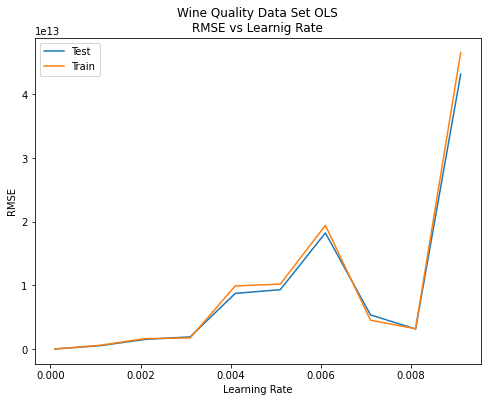

In [347]:
plt.figure(figsize=(8,6)) 
plt.title('Wine Quality Data Set OLS\nRMSE vs Learnig Rate')
plt.plot(interval,rmse_vs_lr_test,label='Test')
plt.plot(interval,rmse_vs_lr_train,label='Train')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## 2. OLS: GridSearchCV

### 2.1 OLS  Finding the Parameters

In [26]:
#learning the parameters
reg_one.get_params()

{'alpha': 0,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 1e-06,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'squared_loss',
 'max_iter': 50,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### 2.2 OLS: Applying the GridSearchCV

In [27]:
#learning rate=0.000009, number of iteration=1000
reg_grid= linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=50,learning_rate='constant',eta0=0.000009)

#setting the parameters to try
parameters={'eta0':[0.000001,0.000009,0.09]}
clf =GridSearchCV(reg_grid,parameters)
clf.fit(d_two_train_x,d_two_train_y)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

GridSearchCV(estimator=SGDRegressor(alpha=0, eta0=9e-06,
                                    learning_rate='constant', max_iter=50),
             param_grid={'eta0': [1e-06, 9e-06, 0.09]})

### 2.3 OLS: Best Configuration by GridSearch

In [28]:
#calling the best hyperparameter configuration
clf.best_estimator_

SGDRegressor(alpha=0, eta0=9e-06, learning_rate='constant', max_iter=50)

Best configuration, like we found manually, second configuration.

### 2.4 OLS: Table of Results for GridSearch

In [29]:
grid_cv_table = pd.DataFrame(clf.cv_results_)
grid_cv_table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008799,0.001722,0.008202,1.390562e-02,1e-06,{'eta0': 1e-06},-4.756816e-02,3.084533e-02,-4.211736e-01,1.266797e-01,4.459695e-03,-6.135141e-02,1.885996e-01,2
1,0.012198,0.009867,0.001202,4.005916e-04,9e-06,{'eta0': 9e-06},7.653261e-02,1.859207e-01,-5.749457e-01,3.321546e-01,2.141258e-01,4.675760e-02,3.213196e-01,1
2,0.002600,0.000798,0.000999,8.064048e-07,0.09,{'eta0': 0.09},-2.550638e+28,-1.455885e+27,-2.921406e+28,-3.941974e+28,-3.674866e+28,-2.646894e+28,1.347228e+28,3


In [30]:
clf.cv_results_['mean_test_score']

array([-6.13514119e-02,  4.67576015e-02, -2.64689444e+28])

### 2.5 OLS: Table of the Mean Test Scores CV of 3 Configuration

In [31]:
cv_for_3_conf=[]
for i in range(0,50):
    #learning rate=0.000009, number of iteration=1000
    reg_grid_cv= linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=i+1,learning_rate='constant',eta0=0.000009)
    #setting the parameters to try
    parameters={'eta0':[0.000001,0.000009,0.09]}
    exm =GridSearchCV(reg_grid_cv,parameters)
    exm.fit(d_two_train_x,d_two_train_y)
    cv_for_3_conf.append(exm.cv_results_['mean_test_score'])

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

In [32]:
table_of_cv_for_3_conf=pd.DataFrame(cv_for_3_conf, columns=['Config 1','Config 2','Config 3'])

In [33]:
index = table_of_cv_for_3_conf.index
index.name = 'Iteration'

In [34]:
table_of_cv_for_3_conf

,Config 1,Config 2,Config 3
Iteration,,,
0,-15.632294,-4.973618,-8.262711e+29
1,-13.332693,-1.472467,-2.014339e+29
2,-11.390281,-0.589123,-1.518469e+28
3,-9.802400,-0.276540,-2.296913e+29
4,-8.488827,-0.143844,-2.688635e+29
5,-7.241367,-0.028778,-1.120659e+29
6,-6.309017,-0.010222,-7.437036e+28
7,-5.425590,0.014197,-1.248742e+29
8,-4.695268,0.023937,-3.652042e+29


### OLS: 2.6 Plotting  CV Mean Score

### OLS with Cross Validation: Hyperparameter 1

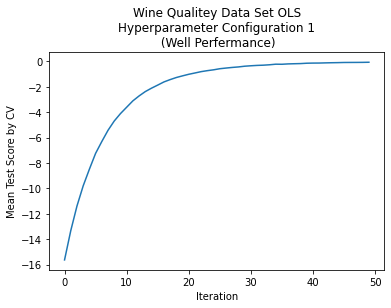

In [35]:
plt.title('Wine Qualitey Data Set OLS\nHyperparameter Configuration 1\n (Well Perfermance)')
plt.plot(np.array(table_of_cv_for_3_conf['Config 1']))
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score by CV')
plt.show()

### OLS with Cross Validation: Hyperparameter 2

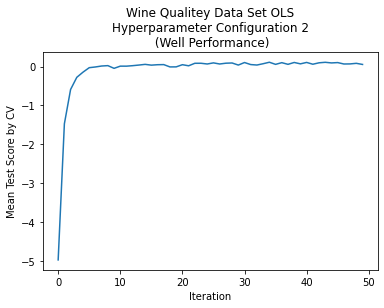

In [36]:
plt.title('Wine Qualitey Data Set OLS\nHyperparameter Configuration 2\n (Well Performance)')
plt.plot(np.array(table_of_cv_for_3_conf['Config 2']))
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score by CV')
plt.show()

### OLS with Cross Validation: Hyperparameter 3

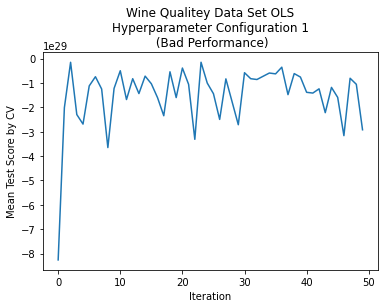

In [37]:
plt.title('Wine Qualitey Data Set OLS\nHyperparameter Configuration 1\n (Bad Performance)')
plt.plot(np.array(table_of_cv_for_3_conf['Config 3']))
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score by CV')
plt.show()

## 3. OLS: Best Hyperparameter

In both cases, manually and by using GridSearchCV, we found that second Hyperparameter configuration $eta0=0.000009$ is has the best perfermance. If we repeat what we did, we can evaluate the model on the test set. 

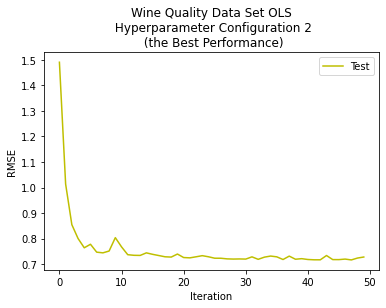

In [38]:
plt.title('Wine Quality Data Set OLS\n Hyperparameter Configuration 2\n (the Best Performance)')
plt.plot(rmse_two_test ,'y',label='Test')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()